In [1]:
!pip install xgboost
!pip install tensorflow


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import re  
from nltk import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
# import string
import warnings

from wordcloud import WordCloud

from sklearn.preprocessing import LabelEncoder,LabelBinarizer

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report,precision_score, recall_score,roc_curve, roc_auc_score, auc

import tensorflow as tf
from tensorflow import keras
from sklearn.utils import class_weight
from sklearn.preprocessing import label_binarize
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D,Dropout,GRU
from keras.models import Sequential
#from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.preprocessing import MinMaxScaler


import imblearn
import warnings
warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv('data/train_data.csv')
train.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,Neutral
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive


In [3]:
test_val=pd.read_csv('data/test_data_hidden.csv')
test_val.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,2016-05-23T00:00:00.000Z,Amazon kindle fire has a lot of free app and c...,very handy device,Positive
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2018-01-02T00:00:00.000Z,The Echo Show is a great addition to the Amazo...,Another winner from Amazon,Positive
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-02T00:00:00.000Z,Great value from Best Buy. Bought at Christmas...,simple to use and reliable so far,Positive
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-03-25T00:00:00.000Z,"I use mine for email, Facebook ,games and to g...",Love it!!!,Positive
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2017-11-15T00:00:00.000Z,This is a fantastic item & the person I bought...,Fantastic!,Positive


In [4]:
test= pd.read_csv("data/test_data.csv")
test.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,2016-05-23T00:00:00.000Z,Amazon kindle fire has a lot of free app and c...,very handy device
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2018-01-02T00:00:00.000Z,The Echo Show is a great addition to the Amazo...,Another winner from Amazon
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-02T00:00:00.000Z,Great value from Best Buy. Bought at Christmas...,simple to use and reliable so far
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-03-25T00:00:00.000Z,"I use mine for email, Facebook ,games and to g...",Love it!!!
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2017-11-15T00:00:00.000Z,This is a fantastic item & the person I bought...,Fantastic!


### Exploratory Data Analysis

In [5]:
train.duplicated().sum(), test.duplicated().sum(), test_val.duplicated().sum()

(np.int64(58), np.int64(3), np.int64(3))

Train dataset contains 58 duplicate records and train dataset contains 3 duplicate records.

In [6]:
train.drop_duplicates(inplace=True)

In [7]:
train.duplicated().sum()

np.int64(0)

In [8]:
train.shape

(3942, 8)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3942 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               3942 non-null   object
 1   brand              3942 non-null   object
 2   categories         3942 non-null   object
 3   primaryCategories  3942 non-null   object
 4   reviews.date       3942 non-null   object
 5   reviews.text       3942 non-null   object
 6   reviews.title      3932 non-null   object
 7   sentiment          3942 non-null   object
dtypes: object(8)
memory usage: 277.2+ KB


In [10]:
test_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               1000 non-null   object
 1   brand              1000 non-null   object
 2   categories         1000 non-null   object
 3   primaryCategories  1000 non-null   object
 4   reviews.date       1000 non-null   object
 5   reviews.text       1000 non-null   object
 6   reviews.title      997 non-null    object
 7   sentiment          1000 non-null   object
dtypes: object(8)
memory usage: 62.6+ KB


Train dataset contains 10 missing values in 'reviews.title' column and test dataset contains 3 missing values in 'reviews.title' column.

In [11]:
#pd.set_option('display.max_colwidth',200)

Reviews containing Positive Sentiments

In [12]:
train[train.sentiment=='Positive'][['reviews.text','reviews.title']].head(10)

,reviews.text,reviews.title
0,Purchased on Black FridayPros - Great Price (e...,Powerful tablet
1,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME
3,"very good product. Exactly what I wanted, and ...",Greattttttt
4,This is the 3rd one I've purchased. I've bough...,Very durable!
5,This is a great product. Light weight. I wish ...,You will love it
7,Purchased this for my son. Has room to upgrade...,Great for kids or smaller needs
8,Bought this for my mom and it was just what sh...,Great tablet
10,"I got this tablet to replace my sons old one, ...",Great Tablet
11,Great product for the kids gaming apps parenta...,Works great
12,Love the choice of colors. Have two kindles of...,great pad for both children and adults


In [13]:
train[train.sentiment=='Neutral'][['reviews.text','reviews.title']].head(10)

,reviews.text,reviews.title
2,Just an average Alexa option. Does show a few ...,Average
6,My 7-year old daughter saved up to by this. He...,OK For Entry Level Tablet
17,"Not as good as before the old kindle, just sea...",Not as good as before
59,There is nothing spectacular about this item b...,"Does what it says, missing one key feature"
95,It's unfair for me to rate this product cause ...,Haven't set it up yet
114,I bought this as s present for my 65 year old ...,Solid tablet
146,Bought this tablet for 8 year old. It holding ...,Fire tablet
147,bought a few kindles in the past but this time...,Came defective
148,"Not a substitute for an iPad, but a really goo...",Good Reader
187,This device is a good if you are looking for a...,Good for 4 year old


In [14]:
train[train.sentiment=='Negative'][['reviews.text','reviews.title']].head(10)

,reviews.text,reviews.title
9,"was cheap, can not run chrome stuff, returned ...","was cheap, can not run chrome stuff, returned"
97,"Worthless, except as a regular echo and a poor...",Useless screen so why pay for it?
104,Too bad Amazon turned this tablet into a big a...,Amazon Fire 7 Tablet
121,I bought this Kindle for my 7 year old grand-d...,Kid's Kindle
150,I am reading positive reviews and wish I could...,Have never purchased a more frustrating Device
151,I have to say it was a little confusing and fr...,not big fan
249,It's a good device for children because they d...,Good for kids
267,the speaker voice quality is terrible compare ...,"terrible product,bad voice quality"
368,Needs to be a stand alone device. I should hav...,Needs to be a stand alone device
530,Has a very good Bluetooth speakers sound quali...,Good Bluetooth speaker


In [15]:
train.sentiment.value_counts()

sentiment
Positive    3694
Neutral      158
Negative      90
Name: count, dtype: int64

### Class Imbalance Problem
In the train dataset, we have 3,749 (~95.1%) sentiments labeled as positive, and 1,58 (~4%) sentiments labeled as Neutral and 93(~2.35%) sentiments as Negative. So, it is an imbalanced classification problem.

In [16]:
pd.DataFrame(train.name.value_counts())

,count
name,
"Amazon Echo Show Alexa-enabled Bluetooth Speaker with 7"" Screen",676
"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",628
Amazon - Echo Plus w/ Built-In Hub - Silver,483
"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Blue Kid-Proof Case",446
"Brand New Amazon Kindle Fire 16gb 7"" Ips Display Tablet Wifi 16 Gb Blue",340
"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Includes Special Offers, Black",294
Amazon Tap - Alexa-Enabled Portable Bluetooth Speaker,177
"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case",175
"Kindle E-reader - White, 6 Glare-Free Touchscreen Display, Wi-Fi - Includes Special Offers",122


In [17]:
#name = pd.DataFrame(train.name.str.split(',').tolist()).stack().unique()
#name = pd.DataFrame(name,columns=['name'])
#name

In [18]:
train.brand.value_counts() , test_val.brand.value_counts()

(brand
 Amazon    3942
 Name: count, dtype: int64,
 brand
 Amazon    1000
 Name: count, dtype: int64)

In [19]:
train.primaryCategories.value_counts()

primaryCategories
Electronics                    2562
Electronics,Hardware           1159
Office Supplies,Electronics     204
Electronics,Media                17
Name: count, dtype: int64

In [20]:
test_val.primaryCategories.value_counts()

primaryCategories
Electronics                    676
Electronics,Hardware           276
Office Supplies,Electronics     41
Electronics,Media                7
Name: count, dtype: int64

In [21]:
pd.DataFrame(train.categories.value_counts())

,count
categories,
"Electronics,iPad & Tablets,All Tablets,Fire Tablets,Tablets,Computers & Tablets",628
"Computers,Amazon Echo,Virtual Assistant Speakers,Audio & Video Components,Electronics Features,Computer Accessories,Home & Tools,See more Amazon Echo Show Smart Assistant - White,Smart Home Automation,Electronics,TVs Entertainment,Speakers,Smart Hub & Kits,Digital Device 3,Consumer Electronics,Wireless Speakers,Home Improvement,Amazon Home,Amazon,Computer Speakers,Voice-Enabled Smart Assistants",514
"Amazon Echo,Smart Home,Networking,Home & Tools,Home Improvement,Smart Home Automation,Voice Assistants,Amazon Home,Amazon,Smart Hub & Kits,Digital Device 3",483
"Computers,Fire Tablets,Electronics Features,Computer Accessories,Tablets,Top Rated,Amazon Tablets,Electronics,Kids' Tablets,iPad & Tablets,Cases & Bags,Electronics, Tech Toys, Movies, Music,Computers & Tablets",446
"Computers/Tablets & Networking,Tablets & eBook Readers,Computers & Tablets,Tablets,All Tablets",340
"Fire Tablets,Computers/Tablets & Networking,Tablets,All Tablets,Amazon Tablets,Frys,Computers & Tablets,Tablets & eBook Readers",294
"Fire Tablets,Tablets,All Tablets,Amazon Tablets,Computers & Tablets",231
"Amazon Echo,Home Theater & Audio,MP3 MP4 Player Accessories,Electronics,Portable Audio,Compact Radios Stereos,Smart Hubs & Wireless Routers,Featured Brands,Smart Home & Connected Living,Home Security,Kindle Store,Electronic Components,Home Automation,Mobile Bluetooth Speakers,Home, Garage & Office,Amazon Tap,Home,Mobile Speakers,TVs & Electronics,Portable Bluetooth Speakers,Bluetooth & Wireless Speakers,Electronics Features,Frys,Speakers,Mobile,Digital Device 3,Smart Home,Home Improvement,Electronics, Tech Toys, Movies, Music,Smart Home & Home Automation Devices,Smart Hubs,MP3 Player Accessories,Home Safety & Security,Voice Assistants,Amazon Home,Alarms & Sensors,Portable Audio & Electronics,Amazon Devices,Audio,Bluetooth Speakers,MP3 Accessories,All Bluetooth & Wireless Speakers",177
"Amazon Echo,Virtual Assistant Speakers,Electronics Features,Home & Tools,Smart Home Automation,TVs Entertainment,Speakers,Smart Hub & Kits,Digital Device 3,Wireless Speakers,Smart Home,Home Improvement,Voice Assistants,Amazon Home,Amazon",162


In [22]:
#categories = pd.DataFrame(train.categories.str.split(',').tolist()).stack().unique()
#categories = pd.DataFrame(categories,columns=['Categories'])
#categories

In [23]:
train.dtypes


name                 object
brand                object
categories           object
primaryCategories    object
reviews.date         object
reviews.text         object
reviews.title        object
sentiment            object
dtype: object

### Data Cleaning

In [24]:
# Removing brand column
del train['brand']
del test_val['brand']
del test['brand']

# New columns - Day, Month, Year from date column 
train['reviews.date'] = train['reviews.date'].str.split('T').str[0]
test_val['reviews.date'] = test_val['reviews.date'].str.split('T').str[0]
test['reviews.date'] = test['reviews.date'].str.split('T').str[0]

train['reviews_day'] = pd.to_datetime(train['reviews.date'], format='%Y-%m-%d').dt.day
train['reviews_month'] = pd.to_datetime(train['reviews.date'], format='%Y-%m-%d').dt.month
train['reviews_year'] = pd.to_datetime(train['reviews.date'], format='%Y-%m-%d').dt.year

test_val['reviews_day'] = pd.to_datetime(test_val['reviews.date'], format='%Y-%m-%d').dt.day
test_val['reviews_month'] = pd.to_datetime(test_val['reviews.date'], format='%Y-%m-%d').dt.month
test_val['reviews_year'] = pd.to_datetime(test_val['reviews.date'], format='%Y-%m-%d').dt.year

test['reviews_day'] = pd.to_datetime(test['reviews.date'], format='%Y-%m-%d').dt.day
test['reviews_month'] = pd.to_datetime(test['reviews.date'], format='%Y-%m-%d').dt.month
test['reviews_year'] = pd.to_datetime(test['reviews.date'], format='%Y-%m-%d').dt.year

del train['reviews.date']
del test['reviews.date']
del test_val['reviews.date']

train.head()

,name,categories,primaryCategories,reviews.text,reviews.title,sentiment,reviews_day,reviews_month,reviews_year
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive,26,12,2016
1,Amazon - Echo Plus w/ Built-In Hub - Silver,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive,17,1,2018
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",Just an average Alexa option. Does show a few ...,Average,Neutral,20,12,2017
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...","eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics","very good product. Exactly what I wanted, and ...",Greattttttt,Positive,4,8,2017
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...","Computers/Tablets & Networking,Tablets & eBook...",Electronics,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive,23,1,2017


In [25]:
# Lebel Encoding for item names, categories, primary categories
name = list(set(list(train['name'])+list(test_val['name'])))
categories = list( set( list( train['categories']) + list(test_val['categories'])))
primaryCategories = list(train['primaryCategories'].unique())

le_name = LabelEncoder()
le_cat = LabelEncoder()
le_pri = LabelEncoder()
le_name.fit(name)
le_cat.fit(categories)
le_pri.fit(primaryCategories)

train['name'] = le_name.transform(train.name)
train['categories'] = le_cat.transform(train.categories)
train['primaryCategories'] = le_pri.transform(train.primaryCategories)
test_val['name'] = le_name.transform(test_val.name)
test_val['categories'] = le_cat.transform(test_val.categories)
test_val['primaryCategories'] = le_pri.transform(test_val.primaryCategories)
test['name'] = le_name.transform(test.name)
test['categories'] = le_cat.transform(test.categories)
test['primaryCategories'] = le_pri.transform(test.primaryCategories)

In [26]:
# Missing Values 
train['reviews.title'].fillna(value=' ',inplace=True)
test_val['reviews.title'].fillna(value=' ',inplace=True)
test['reviews.title'].fillna(value=' ',inplace=True)

In [27]:
# Text data cleaning : reviews.text, reviews.title

tok = WordPunctTokenizer()
ps = PorterStemmer()
wnl = WordNetLemmatizer()

negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}

neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

def data_cleaner(text):
    text = text.replace(r"Äú",'')
    text = text.replace(r'Äù','')
    text = text.replace(r'‚Äô','\'')
    text = text.lower()
    text = text.replace(r'‚Äô','\'')
    text = neg_pattern.sub(lambda x: negations_dic[x.group()], text)
    text = re.sub("[^a-zA-Z0-9\"]", " ", text)
    word_tok=[x for x in tok.tokenize(text) if len(x) > 3]
#     word_stem = [ps.stem(i) for i in word_tok]
#     return (" ".join(word_stem).strip())  
    word_lem = [wnl.lemmatize(i) for i in word_tok]
    return (" ".join(word_lem).strip()) 

for i in (train,test_val,test):
    i['reviews.text']=i['reviews.text'].apply(data_cleaner)
    i['reviews.title']=i['reviews.title'].apply(data_cleaner) 

In [28]:
test[['reviews.text','reviews.title']].head(10)

,reviews.text,reviews.title
0,amazon kindle fire free used that want online ...,very handy device
1,echo show great addition amazon family work ju...,another winner from amazon
2,great value from best bought christmas sale,simple reliable
3,mine email facebook game line also have down l...,love
4,this fantastic item person bought love,fantastic
5,this great devise reading book taking photo be...,book reader
6,have enjoyed learning about home automation us...,first experience with alexa
7,nice size very clear randomly shuts cant remov...,great size
8,awesome product cool design great color would ...,great gift
9,love mine work great with prime have best movie,great


### Visualization

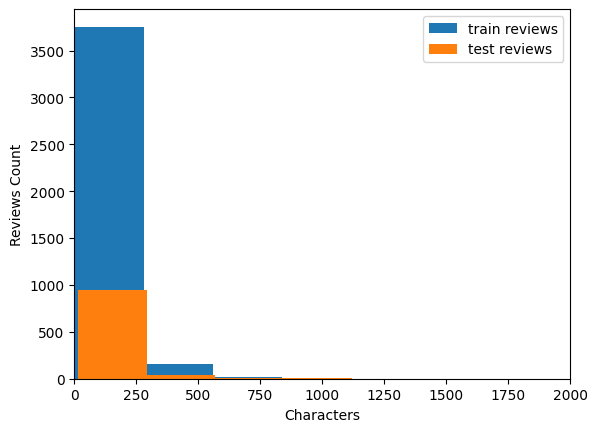

In [29]:
train_len=train["reviews.text"].str.len()
test_len=test["reviews.text"].str.len()
plt.hist(train_len,bins=20,label="train reviews")
plt.hist(test_len,bins=20,label="test reviews")
plt.legend()
plt.xlim(0,2000)
plt.xlabel('Characters')
plt.ylabel('Reviews Count')
plt.show()

In [30]:
all_text = ' '.join([text for text in train['reviews.text']])
pos_text = ' '.join([text for text in train['reviews.text'][train['sentiment']=='Positive']])
neg_text = ' '.join([text for text in train['reviews.text'][train['sentiment']=='Negative']])
neu_text = ' '.join([text for text in train['reviews.text'][train['sentiment']=='Neutral']])

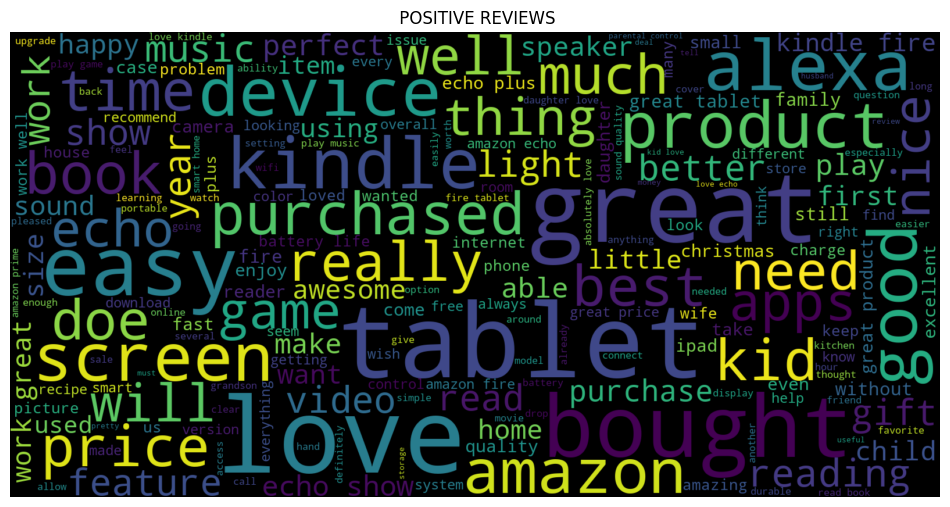

In [31]:
wordcloud = WordCloud(width=1600, height=800, random_state=21, max_font_size=180).generate(pos_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(' POSITIVE REVIEWS')
plt.show()

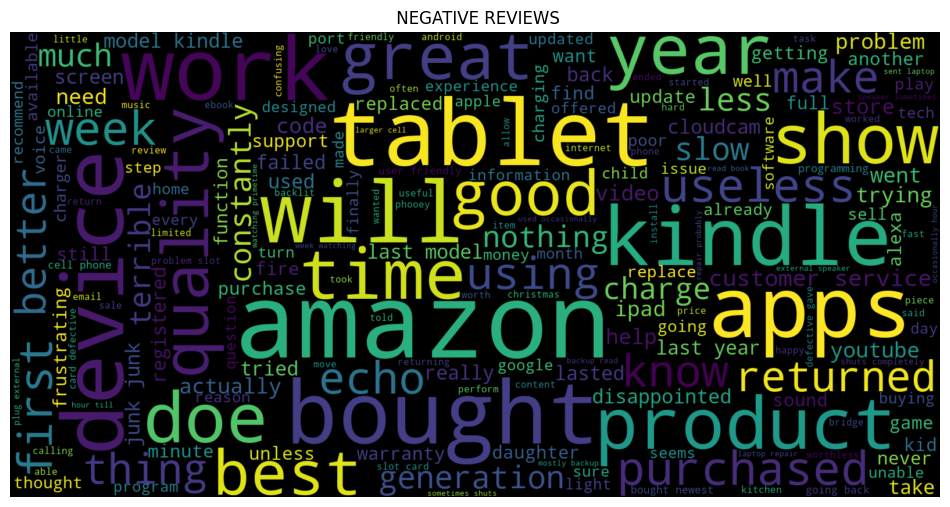

In [32]:
wordcloud = WordCloud(height=800, width=1600, random_state=21,max_font_size=180).generate(neg_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(' NEGATIVE REVIEWS')
plt.show()

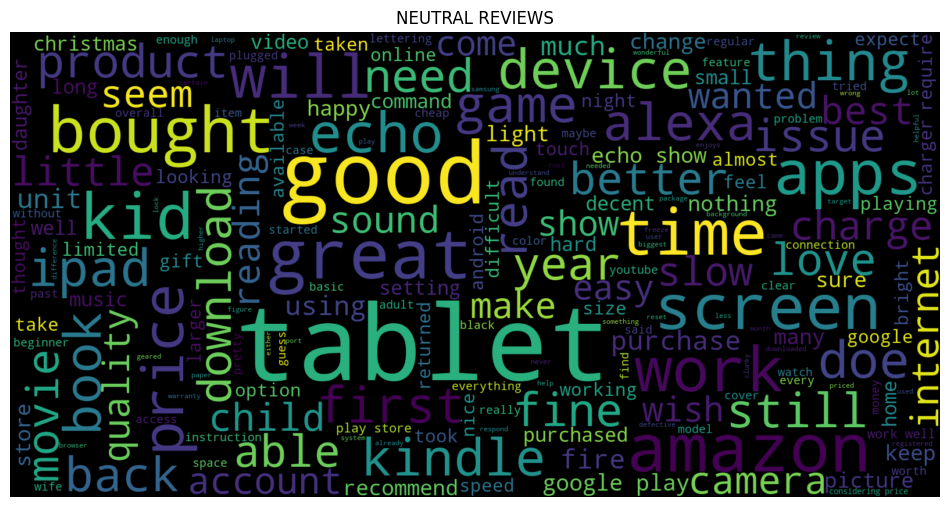

In [33]:
wordcloud = WordCloud(height=800, width=1600, random_state=21,max_font_size=180).generate(neu_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('NEUTRAL REVIEWS')
plt.show()

In [34]:
le_senti = LabelEncoder()
train['sentiment'] = le_senti.fit_transform(train['sentiment'])
test_val['sentiment'] = le_senti.fit_transform(test_val['sentiment'])

In [35]:
train.head()

,name,categories,primaryCategories,reviews.text,reviews.title,sentiment,reviews_day,reviews_month,reviews_year
0,2,10,0,purchased black fridaypros great price even sa...,powerful tablet,2,26,12,2016
1,5,1,1,purchased amazon echo plus dot plus four fire ...,amazon echo plus awesome,2,17,1,2018
2,9,2,1,just average alexa option doe show thing scree...,average,1,20,12,2017
3,14,22,3,very good product exactly what wanted very goo...,greattttttt,2,4,8,2017
4,13,9,0,this purchased bought niece other case compare...,very durable,2,23,1,2017


### TFIDF Vectorizer

In [36]:
tvec1 = TfidfVectorizer()
tvec2 = TfidfVectorizer()
tvec3 = TfidfVectorizer()

In [37]:
# Preparing Features X(text,title) and Label y(sentiment)

train1 = train.reset_index()
combi1=pd.concat([train1,test_val],axis=0,join='outer')

tvec1.fit(combi1['reviews.text'])
tvec_text1 = pd.DataFrame(tvec1.transform(train1['reviews.text']).toarray())
tvec_text2 = pd.DataFrame(tvec1.transform(test_val['reviews.text']).toarray())

tvec2.fit(combi1['reviews.title'])
tvec_title1 = pd.DataFrame(tvec2.transform(train1['reviews.title']).toarray())
tvec_title2 = pd.DataFrame(tvec2.transform(test_val['reviews.title']).toarray())

Train1 = pd.concat([train1.drop(['reviews.text','reviews.title','sentiment','index'],axis=1),tvec_text1, tvec_title1],axis=1)
Test_Val1 = pd.concat([test_val.drop(['reviews.text','reviews.title','sentiment'],axis=1),tvec_text2, tvec_title2],axis=1)

x_train1=Train1.values
y_train1=train['sentiment'].values

x_val1=Test_Val1.values
y_val1 = test_val['sentiment'].values

In [38]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction import text

punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%"]
stop_words = text.ENGLISH_STOP_WORDS.union(punc)

stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'[a-zA-Z\']+')

def tokenize(text):
    return [stemmer.stem(word) for word in tokenizer.tokenize(text.lower())]

tvec3 = TfidfVectorizer(stop_words = list(stop_words), tokenizer = tokenize, max_features = 1000)

reviews=tvec3.fit_transform(combi1['reviews.text'])
words = tvec3.get_feature_names_out()

### Multinomial Naive Bayes

In [39]:
nb = MultinomialNB()
nb.fit(Train1.values,train1['sentiment'])
y_pred = nb.predict(Test_Val1.values)
y_val = test_val['sentiment']
print(confusion_matrix(y_true=y_val, y_pred=y_pred))
print(classification_report(y_true=y_val, y_pred=y_pred))
print(accuracy_score(y_val, y_pred)*100)

[[  0   0  24]
 [  0   0  39]
 [  0   0 937]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.00      0.00      0.00        39
           2       0.94      1.00      0.97       937

    accuracy                           0.94      1000
   macro avg       0.31      0.33      0.32      1000
weighted avg       0.88      0.94      0.91      1000

93.7


Everything is classified as Positive because of Imbalance Class


#### Tackling Class Imbalance Problem:

In [40]:
train.sentiment.value_counts()

sentiment
2    3694
1     158
0      90
Name: count, dtype: int64

In [41]:
count_2, count_1, count_0 =train.sentiment.value_counts()
class_2 = train[train.sentiment==2]
class_1 = train[train.sentiment==1]
class_0 = train[train.sentiment==0]
count_2, count_1, count_0

(3694, 158, 90)

#### 1. UnderSampling

In [42]:
class_2_under = class_2.sample(count_1)
train_under= pd.concat([class_2_under,class_1,class_0],axis=0)
print(train_under.shape)
print(train_under.sentiment.value_counts())

(406, 9)
sentiment
2    158
1    158
0     90
Name: count, dtype: int64


#### 2. OverSampling


In [43]:
class_0_over = class_0.sample(count_2,replace=True)
class_1_over = class_1.sample(count_2,replace=True)
train_over = pd.concat([class_2,class_0_over,class_1_over],axis=0)
print(train_over.shape)
print(train_over.sentiment.value_counts())

(11082, 9)
sentiment
2    3694
0    3694
1    3694
Name: count, dtype: int64


In [44]:
lr= LogisticRegression(C=30, class_weight='balanced', solver='sag', 
                         multi_class='multinomial', n_jobs=6, random_state=40, 
                         verbose=1, max_iter=1000)

#### TFIDF Vectorizer for under-sampled data

In [45]:
train = train_under.reset_index(drop=True) 
#combi = train.append(test_val,ignore_index=True)
combi=pd.concat([train,test_val],axis=0,join='outer')
print(combi.shape)

tvec1.fit(combi['reviews.text'])
tvec_text1 = pd.DataFrame(tvec1.transform(train['reviews.text']).toarray())
tvec_text2 = pd.DataFrame(tvec1.transform(test_val['reviews.text']).toarray())

tvec2.fit(combi['reviews.title'])
tvec_title1 = pd.DataFrame(tvec2.transform(train['reviews.title']).toarray())
tvec_title2 = pd.DataFrame(tvec2.transform(test_val['reviews.title']).toarray())

Train = pd.concat([train.drop(['reviews.text','reviews.title','sentiment'],axis=1),tvec_text1, tvec_title1],axis=1)
Test_Val = pd.concat([test_val.drop(['reviews.text','reviews.title','sentiment'],axis=1),tvec_text2, tvec_title2],axis=1)
x_train=Train.values
y_train=train['sentiment']
x_val=Test_Val.values
y_val = test_val['sentiment']

(1406, 9)


### Logistic Regression for under-sampled data

In [46]:
lr.fit(x_train,y_train)
y_pred = lr.predict(x_val)
print(confusion_matrix(y_true=y_val, y_pred=y_pred))
print(classification_report(y_true=y_val, y_pred=y_pred))
print('accuracy : ',accuracy_score(y_val, y_pred)*100)

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.


max_iter reached after 18 seconds
[[  9   5  10]
 [ 11   9  19]
 [260 245 432]]
              precision    recall  f1-score   support

           0       0.03      0.38      0.06        24
           1       0.03      0.23      0.06        39
           2       0.94      0.46      0.62       937

    accuracy                           0.45      1000
   macro avg       0.33      0.36      0.25      1000
weighted avg       0.88      0.45      0.58      1000

accuracy :  45.0


0.5009364618373122


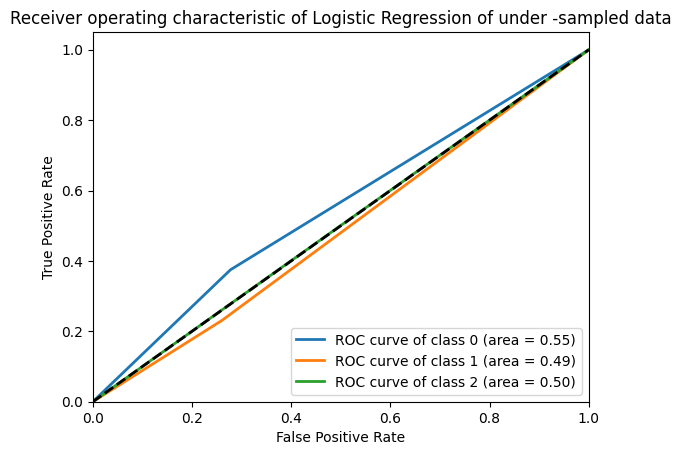

In [47]:
lb = LabelBinarizer()
lb.fit(y_val)
y_val1 = lb.transform(y_val)
y_pred1 = lb.transform(y_pred)
print(roc_auc_score(y_val1, y_pred1, average='weighted'))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_val1[:, i], y_pred1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
lw=2
for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of Logistic Regression of under -sampled data')
plt.legend(loc="lower right")
plt.show()

#### TFIDF Vectorizer for over-sampled data

In [48]:
train = train_over.reset_index(drop=True) 

tvec1.fit(train['reviews.text'])
tvec_text1 = pd.DataFrame(tvec1.transform(train['reviews.text']).toarray())
tvec_text2 = pd.DataFrame(tvec1.transform(test_val['reviews.text']).toarray())

tvec2.fit(train['reviews.title'])
tvec_title1 = pd.DataFrame(tvec2.transform(train['reviews.title']).toarray())
tvec_title2 = pd.DataFrame(tvec2.transform(test_val['reviews.title']).toarray())

Train = pd.concat([train.drop(['reviews.text','reviews.title','sentiment'],axis=1),tvec_text1, tvec_title1],axis=1)
Test_Val = pd.concat([test_val.drop(['reviews.text','reviews.title','sentiment'],axis=1),tvec_text2, tvec_title2],axis=1)

Train.to_csv('Train.csv',encoding='utf-8')
Test_Val.to_csv('Test_Val.csv',encoding='utf-8')

x_train=Train.values
y_train=train['sentiment'].values
x_val=Test_Val.values
y_val = test_val['sentiment'].values

### Logistic Regression for over-sampled data

In [49]:
lr.fit(x_train,y_train)
y_pred = lr.predict(x_val)
print(confusion_matrix(y_true=y_val, y_pred=y_pred))
print(classification_report(y_true=y_val, y_pred=y_pred))
print('accuracy : ',accuracy_score(y_val, y_pred)*100)

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.


max_iter reached after 714 seconds
[[ 12   4   8]
 [  9  11  19]
 [179 179 579]]
              precision    recall  f1-score   support

           0       0.06      0.50      0.11        24
           1       0.06      0.28      0.09        39
           2       0.96      0.62      0.75       937

    accuracy                           0.60      1000
   macro avg       0.36      0.47      0.32      1000
weighted avg       0.90      0.60      0.71      1000

accuracy :  60.199999999999996


Logistic Regression on over-sampled data is perfrorming better than under-sampled data

0.5941894908455526


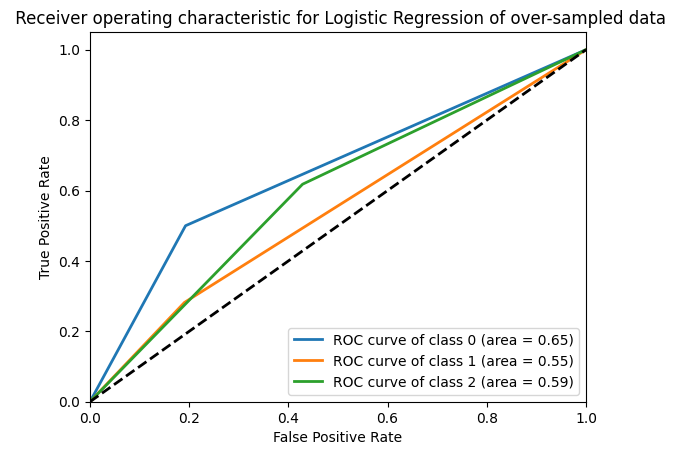

In [50]:
lb = LabelBinarizer()
lb.fit(y_val)
y_val1 = lb.transform(y_val)
y_pred1 = lb.transform(y_pred)
print(roc_auc_score(y_val1, y_pred1, average='weighted'))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_val1[:, i], y_pred1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
lw=2
for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' Receiver operating characteristic for Logistic Regression of over-sampled data')
plt.legend(loc="lower right")
plt.show()

### Multinomial Naive Bayes

In [51]:
nb = MultinomialNB()
nb.fit(x_train,y_train)
y_pred = nb.predict(x_val)
print(confusion_matrix(y_true=y_val, y_pred=y_pred))
print(classification_report(y_true=y_val, y_pred=y_pred))
print(accuracy_score(y_val, y_pred)*100)
print(nb.score(x_train,y_train))
print(nb.score(x_val,y_val))

[[ 13   3   8]
 [  4  13  22]
 [ 10  91 836]]
              precision    recall  f1-score   support

           0       0.48      0.54      0.51        24
           1       0.12      0.33      0.18        39
           2       0.97      0.89      0.93       937

    accuracy                           0.86      1000
   macro avg       0.52      0.59      0.54      1000
weighted avg       0.92      0.86      0.89      1000

86.2
0.9498285508031041
0.862


0.7058252426198639

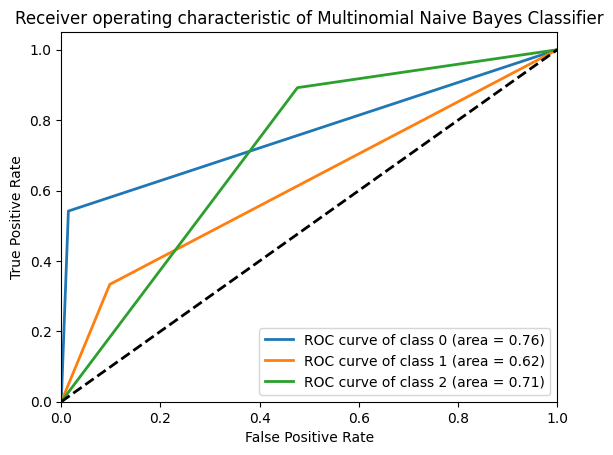

In [52]:
lb = LabelBinarizer()
lb.fit(y_val)
y_val1 = lb.transform(y_val)
y_pred1 = lb.transform(y_pred)
print(roc_auc_score(y_val1, y_pred1, average='weighted'))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_val1[:, i], y_pred1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
lw=2
for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of Multinomial Naive Bayes Classifier')
plt.legend(loc="lower right")
plt.show()


### Random Forest Classifier

In [53]:
rf= RandomForestClassifier(n_estimators=400,random_state=10).fit(x_train,y_train)
y_pred=rf.predict(x_val)
print(confusion_matrix(y_true=y_val, y_pred=y_pred))
print(classification_report(y_true=y_val, y_pred=y_pred))
print('accuracy : ',accuracy_score(y_val, y_pred)*100)
print(rf.score(x_train,y_train))
print(rf.score(x_val,y_val))

[[  7   0  17]
 [  0  10  29]
 [  0   0 937]]
              precision    recall  f1-score   support

           0       1.00      0.29      0.45        24
           1       1.00      0.26      0.41        39
           2       0.95      1.00      0.98       937

    accuracy                           0.95      1000
   macro avg       0.98      0.52      0.61      1000
weighted avg       0.96      0.95      0.94      1000

accuracy :  95.39999999999999
1.0
0.954


0.6349206349206349


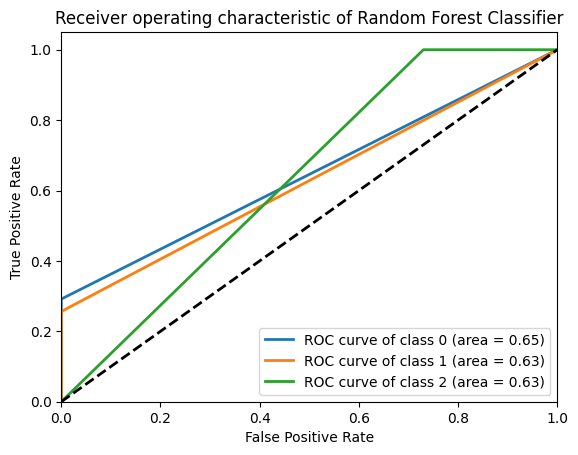

In [54]:
lb = LabelBinarizer()
lb.fit(y_val)
y_val1 = lb.transform(y_val)
y_pred1 = lb.transform(y_pred)
print(roc_auc_score(y_val1, y_pred1, average='weighted'))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_val1[:, i], y_pred1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
lw=2
for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()

### XGBClassifier

In [55]:
xgb= XGBClassifier(n_estimators=1000,max_depth=6).fit(x_train,y_train)
y_pred=xgb.predict(x_val)
print(confusion_matrix(y_true=y_val, y_pred=y_pred))
print(classification_report(y_true=y_val, y_pred=y_pred))
print("accuracy : ",accuracy_score(y_val, y_pred)*100)

[[ 10   2  12]
 [  2  12  25]
 [  1   3 933]]
              precision    recall  f1-score   support

           0       0.77      0.42      0.54        24
           1       0.71      0.31      0.43        39
           2       0.96      1.00      0.98       937

    accuracy                           0.95      1000
   macro avg       0.81      0.57      0.65      1000
weighted avg       0.95      0.95      0.95      1000

accuracy :  95.5


0.7022108642874879


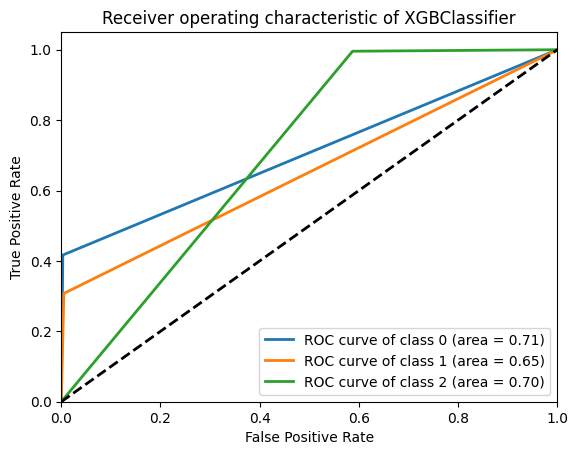

In [56]:
lb = LabelBinarizer()
lb.fit(y_val)
y_val1 = lb.transform(y_val)
y_pred1 = lb.transform(y_pred)
print(roc_auc_score(y_val1, y_pred1, average='weighted'))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_val1[:, i], y_pred1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
lw=2
for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of XGBClassifier')
plt.legend(loc="lower right")
plt.show()

We can see that XGBoost is performing better in predicting all the classes.

### Multi-class SVM

In [57]:
svc = SVC(kernel='linear', class_weight='balanced', C=1.0, random_state=0).fit(x_train, y_train) 
y_pred=svc.predict(x_val)
print(confusion_matrix(y_true=y_val, y_pred=y_pred))
print(classification_report(y_true=y_val, y_pred=y_pred))
print("accuracy : ",accuracy_score(y_val, y_pred)*100)

[[ 14   2   8]
 [  4  15  20]
 [ 22  43 872]]
              precision    recall  f1-score   support

           0       0.35      0.58      0.44        24
           1       0.25      0.38      0.30        39
           2       0.97      0.93      0.95       937

    accuracy                           0.90      1000
   macro avg       0.52      0.63      0.56      1000
weighted avg       0.93      0.90      0.91      1000

accuracy :  90.10000000000001


0.7410449943042786


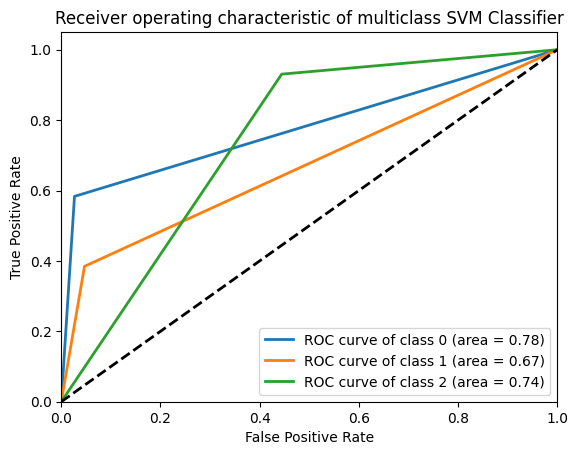

In [58]:
lb = LabelBinarizer()
lb.fit(y_val)
y_val1 = lb.transform(y_val)
y_pred1 = lb.transform(y_pred)
print(roc_auc_score(y_val1, y_pred1, average='weighted'))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_val1[:, i], y_pred1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
lw=2
for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of multiclass SVM Classifier')
plt.legend(loc="lower right")
plt.show()

Naive Bayes


In [59]:
y_train2 = label_binarize(y_train1, classes=[0, 1, 2])

In [60]:
#The model with sequential API
classifier = Sequential()
classifier.add(Dense(units=100,kernel_initializer='he_uniform',activation='relu',input_dim=x_train1.shape[1]))
classifier.add(Dense(units=80,kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dense(units=80,kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dense(units=3,kernel_initializer='normal',activation='softmax'))
#Compile and Run
classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
classifier.fit(x_train1,y_train2,batch_size=256,epochs=100,verbose=0)
#Evaluate
y_pred = classifier.predict(x_val1, batch_size=256)

# Confusion matrix needs both labels & predictions as single-digits, not as one-hot encoded vectors
# predictions are the probabilities, and when np.argmax(..) is applied, it gives the predicted label.
y_pred_bool = np.argmax(y_pred, axis=1)
# label
y_test = np.argmax(y_val1, axis=1) # one hot encoding to a single number for test set

print(confusion_matrix(y_test, y_pred_bool))
print(classification_report(y_test, y_pred_bool))


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[  4  12   8]
 [  0  12  27]
 [  0  11 926]]
              precision    recall  f1-score   support

           0       1.00      0.17      0.29        24
           1       0.34      0.31      0.32        39
           2       0.96      0.99      0.98       937

    accuracy                           0.94      1000
   macro avg       0.77      0.49      0.53      1000
weighted avg       0.94      0.94      0.93      1000



In [61]:

class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                  classes=np.unique(y_train1),
                                                  y=y_train1)
class_weight_dict = dict(enumerate(class_weights))
class_weight_dict

{0: np.float64(14.6),
 1: np.float64(8.316455696202532),
 2: np.float64(0.35571196534921495)}

In [62]:
# Using Class-Weights
classifier = Sequential()
classifier.add(Dense(units=50,activation='relu',input_dim=x_train1.shape[1]))
classifier.add(Dense(units=40,activation='relu'))
classifier.add(Dense(units=3,kernel_initializer='normal',activation='softmax'))
classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
classifier.fit(x_train1,y_train2,batch_size=256,epochs=100,class_weight=class_weight_dict,verbose=0)
y_pred = classifier.predict(x_val1, batch_size=256)
y_pred_bool = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_val1, axis=1)
print(confusion_matrix(y_test, y_pred_bool))
print(classification_report(y_test, y_pred_bool))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[ 11   5   8]
 [  3  17  19]
 [  5  48 884]]
              precision    recall  f1-score   support

           0       0.58      0.46      0.51        24
           1       0.24      0.44      0.31        39
           2       0.97      0.94      0.96       937

    accuracy                           0.91      1000
   macro avg       0.60      0.61      0.59      1000
weighted avg       0.93      0.91      0.92      1000



Using class-weights does not improve the performance

In [63]:
#using dropouts
classifier = Sequential()
classifier.add(Dense(units=50,activation='relu',input_dim=x_train1.shape[1]))
classifier.add(Dropout(0.2))
classifier.add(Dense(units=40,activation='relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(units=40,activation='relu'))
classifier.add(Dense(units=3,kernel_initializer='normal',activation='softmax'))
classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
classifier.fit(x_train1,y_train2,batch_size=256,epochs=100,class_weight=class_weight_dict,verbose=0)
y_pred = classifier.predict(x_val1, batch_size=256)
y_pred_bool = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_val1, axis=1)
print(confusion_matrix(y_test, y_pred_bool))
print(classification_report(y_test, y_pred_bool))

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000002B29DEA1940> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[[  0   0  24]
 [  0   0  39]
 [  0   0 937]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.00      0.00      0.00

Using drop out chances of predicting second class increases

In [64]:
y_train3 = label_binarize(y_train, classes=[0, 1, 2])

In [65]:
#for over-sampled data
classifier = Sequential()
classifier.add(Dense(units=50,activation='relu',input_dim=x_train.shape[1]))
classifier.add(Dense(units=40,activation='relu'))
classifier.add(Dense(units=150,activation='relu'))
classifier.add(Dense(units=3,kernel_initializer='normal',activation='softmax'))
classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
classifier.fit(x_train,y_train3,batch_size=256,epochs=10,verbose=0)
y_pred = classifier.predict(x_val, batch_size=256)
y_pred_bool = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_val1, axis=1)
print(confusion_matrix(y_test, y_pred_bool))
print(classification_report(y_test, y_pred_bool))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[[ 13   1  10]
 [  4  11  24]
 [ 11  10 916]]
              precision    recall  f1-score   support

           0       0.46      0.54      0.50        24
           1       0.50      0.28      0.36        39
           2       0.96      0.98      0.97       937

    accuracy                           0.94      1000
   macro avg       0.64      0.60      0.61      1000
weighted avg       0.93      0.94      0.94      1000



Using Over-sampled data for neural network does not improve the performance

### ensemble technique using Voting Classifier: XGboost + oversampled_multinomial_NB

In [66]:
from sklearn.ensemble import VotingClassifier
model1 = MultinomialNB()
model2 =  XGBClassifier(n_estimators=1000,max_depth=6)
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard')
model.fit(x_train,y_train)
y_pred = model.predict(x_val)
print(confusion_matrix(y_true=y_val, y_pred=y_pred))
print(classification_report(y_true=y_val, y_pred=y_pred))
print("accuracy : ",accuracy_score(y_val, y_pred)*100)

[[ 14   2   8]
 [  5  14  20]
 [ 11  93 833]]
              precision    recall  f1-score   support

           0       0.47      0.58      0.52        24
           1       0.13      0.36      0.19        39
           2       0.97      0.89      0.93       937

    accuracy                           0.86      1000
   macro avg       0.52      0.61      0.54      1000
weighted avg       0.92      0.86      0.89      1000

accuracy :  86.1


We can see that the above model performs almost same as oversampled multinomial model but it increases the chances of prediction of minority classes.

### Sentiment Score

In [67]:
!pip install textblob

from textblob import TextBlob
import nltk
nltk.download('punkt')

def senti(x):
    return TextBlob(x).sentiment

def polarity(x):
    return TextBlob(x).sentiment.polarity + 1

train['senti_score'] = train['reviews.text'].apply(senti)
test_val['senti_score'] = test_val['reviews.text'].apply(senti)

train['polarity'] = train['reviews.text'].apply(polarity)
test_val['polarity'] = test_val['reviews.text'].apply(polarity)

train['senti_score'].head()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nidhi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0     (0.37479166666666663, 0.6791666666666667)
1    (0.45821428571428574, 0.49821428571428567)
2                    (0.69, 0.6033333333333335)
3                              (0.1875, 0.4375)
4                   (0.6000000000000001, 0.725)
Name: senti_score, dtype: object

In [68]:
Train = pd.concat([train.drop(['reviews.text','reviews.title','sentiment','senti_score'],axis=1),tvec_text1, tvec_title1],axis=1)
Test_Val = pd.concat([test_val.drop(['reviews.text','reviews.title','sentiment','senti_score'],axis=1),tvec_text2, tvec_title2],axis=1)
x_train=Train.values
y_train=train['sentiment']
x_val=Test_Val.values
y_val = test_val['sentiment']

In [69]:
nb = MultinomialNB()
nb.fit(x_train,y_train)
y_pred = nb.predict(x_val)
print(confusion_matrix(y_true=y_val, y_pred=y_pred))
print(classification_report(y_true=y_val, y_pred=y_pred))
print(accuracy_score(y_val, y_pred)*100)
print(nb.score(x_train,y_train))
print(nb.score(x_val,y_val))

[[ 13   3   8]
 [  4  13  22]
 [  9  91 837]]
              precision    recall  f1-score   support

           0       0.50      0.54      0.52        24
           1       0.12      0.33      0.18        39
           2       0.97      0.89      0.93       937

    accuracy                           0.86      1000
   macro avg       0.53      0.59      0.54      1000
weighted avg       0.92      0.86      0.89      1000

86.3
0.950640678577874
0.863


Sentiment Score does not have much affect on the performance


#### LSTM

In [70]:
from sklearn.preprocessing import label_binarize
from tensorflow.keras.optimizers import Adam


# One-hot encode target labels
y_train2 = label_binarize(y_train1, classes=[0, 1, 2])
y_val2 = label_binarize(y_val1, classes=[0, 1, 2])

# Parameters — reduced
epochs = 3
emb_dim = 64              # reduced embedding
batch_size = 64           # reduced batch size

# Build model
model = Sequential()
model.add(Embedding(5000, emb_dim, input_length=x_train1.shape[1]))
model.add(SpatialDropout1D(0.3))  # lower dropout
model.add(LSTM(32, dropout=0.3, recurrent_dropout=0.3))  # smaller LSTM
model.add(Dense(3, activation='softmax'))

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
model.fit(x_train1, y_train2, epochs=epochs, batch_size=batch_size, validation_data=(x_val1, y_val2))

# Predict
y_pred = model.predict(x_val1, batch_size=32)
y_pred_bool = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_val2, axis=1)

from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred_bool))
print(classification_report(y_test, y_pred_bool))


Epoch 1/3
62/62 ━━━━━━━━━━━━━━━━━━━━ 558s 9s/step - accuracy: 0.8840 - loss: 0.5408 - val_accuracy: 0.9370 - val_loss: 0.2774
Epoch 2/3
62/62 ━━━━━━━━━━━━━━━━━━━━ 550s 9s/step - accuracy: 0.9362 - loss: 0.2806 - val_accuracy: 0.9370 - val_loss: 0.2775
Epoch 3/3
62/62 ━━━━━━━━━━━━━━━━━━━━ 742s 12s/step - accuracy: 0.9372 - loss: 0.2742 - val_accuracy: 0.9370 - val_loss: 0.2770
32/32 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step
[[  0   0  24]
 [  0   0  39]
 [  0   0 937]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.00      0.00      0.00        39
           2       0.94      1.00      0.97       937

    accuracy                           0.94      1000
   macro avg       0.31      0.33      0.32      1000
weighted avg       0.88      0.94      0.91      1000



In [71]:
from sklearn.preprocessing import label_binarize
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix, classification_report

# One-hot encode labels
y_train2 = label_binarize(y_train1, classes=[0, 1, 2])
y_val2 = label_binarize(y_val1, classes=[0, 1, 2])

# Compute class weights
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train1),
    y=y_train1
)
class_weights_dict = dict(enumerate(class_weights))

# Key correction: vocab size
vocab_size = 5000           # or whatever was used in your tokenizer
input_len = x_train1.shape[1]

# Safer model
emb_dim = 64
epochs = 4
batch_size = 64             # reduce batch size for stability

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=emb_dim, input_length=input_len))
model.add(SpatialDropout1D(0.3))  # lowered for stability
model.add(LSTM(32, dropout=0.3, recurrent_dropout=0.3))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train model with class weights
model.fit(x_train1, y_train2, epochs=epochs, batch_size=batch_size,
          validation_data=(x_val1, y_val2),
          class_weight=class_weights_dict)

# Predict and evaluate
y_pred = model.predict(x_val1, batch_size=32)
y_pred_bool = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_val2, axis=1)

print(confusion_matrix(y_test, y_pred_bool))
print(classification_report(y_test, y_pred_bool))


Epoch 1/4
62/62 ━━━━━━━━━━━━━━━━━━━━ 631s 10s/step - accuracy: 0.1121 - loss: 1.1744 - val_accuracy: 0.9370 - val_loss: 1.0360
Epoch 2/4
62/62 ━━━━━━━━━━━━━━━━━━━━ 522s 8s/step - accuracy: 0.7907 - loss: 1.0496 - val_accuracy: 0.0240 - val_loss: 1.1353
Epoch 3/4
62/62 ━━━━━━━━━━━━━━━━━━━━ 516s 8s/step - accuracy: 0.0349 - loss: 1.1262 - val_accuracy: 0.0390 - val_loss: 1.0919
Epoch 4/4
62/62 ━━━━━━━━━━━━━━━━━━━━ 596s 10s/step - accuracy: 0.5892 - loss: 1.0331 - val_accuracy: 0.0240 - val_loss: 1.1229
32/32 ━━━━━━━━━━━━━━━━━━━━ 32s 970ms/step
[[ 24   0   0]
 [ 39   0   0]
 [937   0   0]]
              precision    recall  f1-score   support

           0       0.02      1.00      0.05        24
           1       0.00      0.00      0.00        39
           2       0.00      0.00      0.00       937

    accuracy                           0.02      1000
   macro avg       0.01      0.33      0.02      1000
weighted avg       0.00      0.02      0.00      1000



In [72]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix, classification_report


# One-hot encode labels
y_train2 = label_binarize(y_train, classes=[0, 1, 2])
y_val2 = label_binarize(y_val1, classes=[0, 1, 2])

# Define parameters
vocab_size = 5000        # use the vocab size from your tokenizer
input_len = x_train.shape[1]

emb_dim = 64             # reduced to save memory
epochs = 3
batch_size = 64          # much safer

# Build model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=emb_dim, input_length=input_len))
model.add(SpatialDropout1D(0.3))
model.add(LSTM(32, dropout=0.3, recurrent_dropout=0.3))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train
model.fit(x_train, y_train2, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val2))

# Predict and evaluate
y_pred = model.predict(x_val, batch_size=32)
y_pred_bool = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_val2, axis=1)

print(confusion_matrix(y_test, y_pred_bool))
print(classification_report(y_test, y_pred_bool))


Epoch 1/3
174/174 ━━━━━━━━━━━━━━━━━━━━ 1258s 7s/step - accuracy: 0.3390 - loss: 1.0997 - val_accuracy: 0.9370 - val_loss: 1.0815
Epoch 2/3
174/174 ━━━━━━━━━━━━━━━━━━━━ 1207s 7s/step - accuracy: 0.3307 - loss: 1.0995 - val_accuracy: 0.0240 - val_loss: 1.1248
Epoch 3/3
174/174 ━━━━━━━━━━━━━━━━━━━━ 1276s 7s/step - accuracy: 0.3406 - loss: 1.0991 - val_accuracy: 0.9370 - val_loss: 1.0713
32/32 ━━━━━━━━━━━━━━━━━━━━ 23s 684ms/step
[[  0   0  24]
 [  0   0  39]
 [  0   0 937]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.00      0.00      0.00        39
           2       0.94      1.00      0.97       937

    accuracy                           0.94      1000
   macro avg       0.31      0.33      0.32      1000
weighted avg       0.88      0.94      0.91      1000



#### GRU

In [73]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix, classification_report


# One-hot encode labels
y_train2 = label_binarize(y_train1, classes=[0, 1, 2])
y_val2 = label_binarize(y_val1, classes=[0, 1, 2])

# Define correct vocab size and sequence length
vocab_size = 5000  # should match your tokenizer's vocab size
sequence_length = x_train1.shape[1]

# Build model
emb_dim = 64              # safer embedding dim
epochs = 3
batch_size = 64           # reduce batch size to prevent RAM issues

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=emb_dim, input_length=sequence_length))
model.add(GRU(64, dropout=0.3, recurrent_dropout=0.3))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
model.fit(x_train1, y_train2, epochs=epochs, batch_size=batch_size, validation_data=(x_val1, y_val2))

# Evaluate
y_pred = model.predict(x_val1, batch_size=32)
y_pred_bool = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_val2, axis=1)

print(confusion_matrix(y_test, y_pred_bool))
print(classification_report(y_test, y_pred_bool))


Epoch 1/3
62/62 ━━━━━━━━━━━━━━━━━━━━ 871s 14s/step - accuracy: 0.8709 - loss: 0.5295 - val_accuracy: 0.9370 - val_loss: 0.2776
Epoch 2/3
62/62 ━━━━━━━━━━━━━━━━━━━━ 1106s 18s/step - accuracy: 0.9354 - loss: 0.2890 - val_accuracy: 0.9370 - val_loss: 0.2775
Epoch 3/3
62/62 ━━━━━━━━━━━━━━━━━━━━ 880s 14s/step - accuracy: 0.9319 - loss: 0.2982 - val_accuracy: 0.9370 - val_loss: 0.2786
32/32 ━━━━━━━━━━━━━━━━━━━━ 32s 982ms/step
[[  0   0  24]
 [  0   0  39]
 [  0   0 937]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.00      0.00      0.00        39
           2       0.94      1.00      0.97       937

    accuracy                           0.94      1000
   macro avg       0.31      0.33      0.32      1000
weighted avg       0.88      0.94      0.91      1000



We can see from above that LSTM and GPU models are not efficient in predicting minor classes. ANN is performing quite good in solving class imbalance problem but it cannot beat traditional ML agorithms.

### Clustering of Reviews

In [74]:
print(words[250:300])

['distract' 'doe' 'doesnt' 'dollar' 'dont' 'door' 'doorbel' 'dot'
 'downfal' 'download' 'downsid' 'drain' 'drawback' 'drive' 'drop' 'durabl'
 'dure' 'earli' 'earlier' 'eas' 'easi' 'easier' 'easili' 'ebook' 'echo'
 'edg' 'edit' 'educ' 'effect' 'effici' 'effort' 'electron' 'els' 'email'
 'employe' 'enabl' 'end' 'endless' 'enjoy' 'enlarg' 'entertain' 'entir'
 'entri' 'environ' 'equip' 'eread' 'especi' 'essenti' 'event' 'everi']


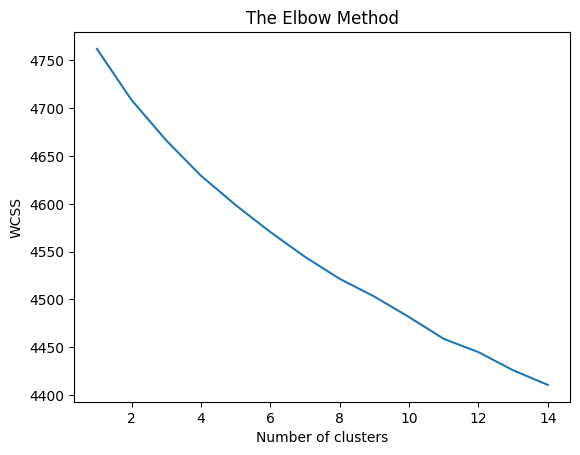

In [75]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,15):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(reviews)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,15),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

As no proper elbow is generated, I will have to select right amount of clusters by trial and error. So, I will showcase the results of different amount of clusters to find out the right amount of clusters.

### 11 Clusters

In [76]:
kmeans = KMeans(n_clusters = 11, n_init = 20) 
kmeans.fit(reviews)
# We look at 6 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : good, tablet, price, product, veri, work, easi, kid, great, qualiti, pretti, read, sound, love, game, play, recommend, nice, pictur, devic, batteri, size, amazon, video, time
1 : veri, easi, happi, great, product, tablet, love, purchas, kindl, durabl, help, satisfi, nice, pleas, work, like, use, price, best, child, amazon, grandson, bought, year, size
2 : alexa, love, light, great, echo, speaker, thing, home, devic, turn, famili, use, like, just, work, product, smart, abl, amazon, time, screen, hous, sound, answer, control
3 : echo, plus, great, love, sound, amazon, video, home, work, like, devic, product, smart, bulb, easi, better, featur, screen, light, alexa, addit, thing, speaker, hous, purchas
4 : love, bought, year, grandson, easi, daughter, christma, tablet, granddaught, game, absolut, kid, kindl, birthday, parent, wife, play, veri, great, like, purchas, niec, grandkid, nephew, control
5 : gift, love, christma, bought, purchas, great, wife, perfect, easi, absolut, price, tab

### 13 Clusters

In [77]:
kmeans = KMeans(n_clusters = 13, n_init = 20) 
kmeans.fit(reviews)
# We look at 13 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : veri, easi, happi, product, love, great, purchas, bought, tablet, learn, work, qualiti, pleas, year, kindl, item, amazon, friend, child, help, use, conveni, nice, fast, time
1 : great, work, product, price, recommend, easi, sound, love, tablet, best, like, just, bought, high, need, valu, color, speaker, featur, friend, app, camera, awesom, addit, littl
2 : kindl, love, read, upgrad, great, best, second, better, screen, replac, like, model, bought, year, light, easi, size, origin, purchas, veri, use, tablet, charg, version, doe
3 : enjoy, realli, play, use, tablet, bought, veri, daughter, product, famili, great, video, game, love, year, purchas, grandson, recommend, kindl, alexa, gift, music, read, easi, echo
4 : gift, love, christma, bought, purchas, great, wife, perfect, absolut, easi, price, year, kindl, tablet, product, mother, gave, like, work, birthday, veri, granddaught, kid, famili, friend
5 : alexa, music, love, play, light, listen, question, home, great, turn, thing, hous,

### Topic Modelling

In [78]:
from sklearn.decomposition import LatentDirichletAllocation as LDA
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
# Tweak the two parameters below
number_topics = 10
number_words = 10
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(reviews)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, tvec3, number_words)

Topics found via LDA:

Topic #0:
kid great tablet love camera year work download app educ

Topic #1:
tablet price great good kindl read need size everyth ipad

Topic #2:
kindl book tablet read love movi great like watch batteri

Topic #3:
echo alexa music love home sound video smart great plus

Topic #4:
game tablet play love daughter learn year purchas great bought

Topic #5:
love light great music devic easi read book hous want

Topic #6:
veri everyon run school amazon thing everi inform hope love

Topic #7:
love bought granddaught wife tablet kindl gift easi birthday like

Topic #8:
great sound good easi use qualiti read app pictur speaker

Topic #9:
great product veri easi love recommend christma gift happi friend


In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(train['reviews.text'])  # use your dataframe column as corpus


In [80]:
import pickle

# Save model
with open('sentiment_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save vectorizer (assuming its name is tfidf)
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)


In [1]:
# train_model.py
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import joblib

# Step 1: Load dataset
df = pd.read_csv("train_data.csv")
df = df.dropna(subset=["reviews.text", "label"])

# Step 2: Add custom negation and sentiment examples
custom_examples = pd.DataFrame({
    "reviews.text": [
        "this product is not bad",
        "not bad at all",
        "not horrible",
        "not good",
        "the product is very good",
        "not the worst",
        "not a bad product",
        "it's not awful",
        "not terrible",
        "it's not great",
        "it's not that bad",
        "this product is bad",
        "very bad product",
        "bad quality",
        "worst product ever",
        "not satisfied",
        "really bad experience",
        "complete waste of money",
        "bad build quality",
        "terrible product",
        "did not like the product",
          # Neutral (1)
        "the product works fine but nothing exceptional",
        "average performance, okay for basic tasks",
        "build quality is average but usable",
        "received the item late but it works",
        "not bad, not great either",
        "performance is acceptable for daily use",
        "okay-ish product, nothing special",
        "battery life is decent but not impressive"
    ],
    "label": [
        2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0,1,1,1,1,1,1,1,1
    ]
})

# Step 2b: Add extra positive reviews
custom_positive = pd.DataFrame({
    'reviews.text': [
        'this product is very good',
        'absolutely fantastic product',
        'really satisfied and very happy',
        'worth buying, highly recommended'
    ],
    'label': [2, 2, 2, 2]  # 2 = Positive
})

# Step 3: Combine original + custom examples
df = pd.concat([df, custom_examples, custom_positive], ignore_index=True)

# Step 4: Features and labels
X = df["reviews.text"]
y = df["label"]

# Step 5: Pipeline with bigram TF-IDF
pipeline = Pipeline([
    ("tfidf", TfidfVectorizer(ngram_range=(1, 2), max_features=5000)),
    ("clf", LogisticRegression(max_iter=1000))
])

# Step 6: Train the model
pipeline.fit(X, y)

# Step 7: Save model
joblib.dump(pipeline, "model.pkl")
print(" Model trained with bigrams + custom reviews — saved to model.pkl")


 Model trained with bigrams + custom reviews — saved to model.pkl
